# **Analysing Gender Pay Gap**

# *Importing Libraries*

In [4]:
import numpy as np # linear algebra
import pandas as pd
import plotly.graph_objs as go

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
import seaborn as sns

import pandas_profiling

import random
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [57]:
pip install statsmodel.api

Note: you may need to restart the kernel to use updated packages.Could not fetch URL https://pypi.org/simple/statsmodel-api/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/statsmodel-api/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1129)'))) - skipping



ERROR: Could not find a version that satisfies the requirement statsmodel.api (from versions: none)
ERROR: No matching distribution found for statsmodel.api
You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import statsmodels.api as sm 

# *Loading Dataset*

In [6]:
df = pd.read_csv('E:\VIT SEM 6\DV-Theory\Glassdoor Gender Pay Gap.csv')

# *Basic Data Analysis*

In [7]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.head()

JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319

In [9]:
df.describe()

Age     PerfEval    Seniority        BasePay         Bonus
count  1000.000000  1000.000000  1000.000000    1000.000000   1000.000000
mean     41.393000     3.037000     2.971000   94472.653000   6467.161000
std      14.294856     1.423959     1.395029   25337.493272   2004.377365
min      18.000000     1.000000     1.000000   34208.000000   1703.000000
25%      29.000000     2.000000     2.000000   76850.250000   4849.500000
50%      41.000000     3.000000     3.000000   93327.500000   6507.000000
75%      54.250000     4.000000     4.000000  111558.000000   8026.000000
max      65.000000     5.000000     5.000000  179726.000000  11293.000000

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
df['TotalPay'] = df['BasePay'] + df['Bonus']

In [12]:
print('Job Titles: ')
df.JobTitle.value_counts()

Job Titles: 


Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: JobTitle, dtype: int64

In [13]:
print('Education Level: ')
df.Education.value_counts()

Education Level: 


High School    265
Masters        256
College        241
PhD            238
Name: Education, dtype: int64

# *Visualisation*

In [14]:
gender = df.groupby('Gender').count()

fig = go.Figure(data=[go.Bar(
            x = gender.index,
            y = gender['JobTitle'],
            #text=y,
            width=0.3,
            textposition='auto',
            marker=dict()
 )])

fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"
fig.update_layout(yaxis=dict(title=''),width=500,height=500,
                  title= 'No of Male and Female Job Entries on the Dataset',
                  xaxis=dict(title='Gender'))
fig.show()

In [15]:
gender_dept = df.groupby(['Dept','Gender']).size().reset_index(name='counts')
fig = px.bar(gender_dept, x='Dept',y='counts',color='Gender',barmode='group', title ='Count Gender per Department')
fig.show()

In [16]:
title = pd.get_dummies(df, columns=['Gender']).groupby('Dept').sum()

female = go.Pie(labels=title.index,values=title['Gender_Female'],name="Female",hole=0.5,domain={'x': [0,0.46]})
male = go.Pie(labels=title.index,values=title['Gender_Male'],name="Male",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Department Distribution', font=dict(size=14), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[female, male], layout=layout)
py.iplot(fig)

In [17]:
gender_job = df.groupby(['JobTitle','Gender']).size().reset_index(name='counts')
fig = px.bar(gender_job, x='JobTitle',y='counts',color='Gender',barmode='group', title ='Count Gender per JobTitle')
fig.show()

In [18]:
title = pd.get_dummies(df, columns=['Gender']).groupby('JobTitle').sum()

female = go.Pie(labels=title.index,values=title['Gender_Female'],name="Female",hole=0.5,domain={'x': [0,0.46]})
male = go.Pie(labels=title.index,values=title['Gender_Male'],name="Male",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Job Title Distribution', font=dict(size=14), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[female, male], layout=layout)
py.iplot(fig)

In [16]:
df.describe(include='all')

JobTitle Gender          Age     PerfEval    Education  \
count                  1000   1000  1000.000000  1000.000000         1000   
unique                   10      2          NaN          NaN            4   
top     Marketing Associate   Male          NaN          NaN  High School   
freq                    118    532          NaN          NaN          265   
mean                    NaN    NaN    41.393000     3.037000          NaN   
std                     NaN    NaN    14.294856     1.423959          NaN   
min                     NaN    NaN    18.000000     1.000000          NaN   
25%                     NaN    NaN    29.000000     2.000000          NaN   
50%                     NaN    NaN    41.000000     3.000000          NaN   
75%                     NaN    NaN    54.250000     4.000000          NaN   
max                     NaN    NaN    65.000000     5.000000          NaN   

              Dept    Seniority        BasePay         Bonus       TotalPay  
count         1000  1000.000000    1000.000000   1000.000000    1000.000000  
unique           5          NaN            NaN           NaN            NaN  
top     Operations          NaN            NaN           NaN            NaN  
freq           210          NaN            NaN           NaN            NaN  
mean           NaN     2.971000   94472.653000   6467.161000  100939.814000  
std            NaN     1.395029   25337.493272   2004.377365   25156.599655  
min            NaN     1.000000   34208.000000   1703.000000   40828.000000  
25%            NaN     2.000000   76850.250000   4849.500000   83443.000000  
50%            NaN     3.000000   93327.500000   6507.000000  100047.000000  
75%            NaN     4.000000  111558.000000   8026.000000  117656.000000  
max            NaN     5.000000  179726.000000  11293.000000  184010.000000

In [19]:
fig = px.bar(df, x="Dept", y="BasePay", color="Gender", 
             facet_col="JobTitle", facet_col_wrap=2, facet_row_spacing =0.1)

fig.update_layout(
    title='Base Pay per JobTite',
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    height =1200
    
)


fig.show()

Woman: earns more as Marketing Associate in all department Man: earns significally more as software engineer

rest usually man earn higher base pay

In [20]:
#Age-Gender Distribution 
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
#sns.set_style('ticks')

sns.kdeplot(data=df, x='Age', hue='Gender', fill=True, ax=ax[0])
sns.boxenplot(data=df, x='Gender', y='Age', ax=ax[1])

sns.despine()
plt.show()

In [21]:
pip install palette_binary_3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement palette_binary_3 (from versions: none)
ERROR: No matching distribution found for palette_binary_3


# Logistic Regression


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, log_loss, roc_auc_score
import statsmodels.api as sm 
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
plt.style.use('ggplot')

In [3]:
 pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [24]:
pay_gap_logistic=df
bins = [17, 35, 50, 66]
labels = ['Young Adults','Middle-aged Adults','Old Adults']
pay_gap_logistic['Age'] = pd.cut(pay_gap_logistic['Age'], bins = bins, labels=labels)

In [25]:
bins = [34000, 100000, 180000]
labels = ['Low income','High income']
pay_gap_logistic['BasePay'] = pd.cut(pay_gap_logistic['BasePay'], bins = bins, labels=labels)
pay_gap_logistic["BasePay"]=pay_gap_logistic.BasePay.replace(to_replace=['Low income','High income'], value=[0, 1])

In [26]:
pay_gap_logistic["Gender"]=pay_gap_logistic.Gender.replace(to_replace=['Male', 'Female'], value=[0, 1])
pay_gap_logistic

JobTitle  Gender                 Age  PerfEval    Education  \
0       Graphic Designer       1        Young Adults         5      College   
1      Software Engineer       0        Young Adults         5      College   
2    Warehouse Associate       1        Young Adults         4          PhD   
3      Software Engineer       0        Young Adults         5      Masters   
4       Graphic Designer       0        Young Adults         5      Masters   
..                   ...     ...                 ...       ...          ...   
995  Marketing Associate       1          Old Adults         1  High School   
996       Data Scientist       0          Old Adults         1      Masters   
997    Financial Analyst       0  Middle-aged Adults         1  High School   
998    Financial Analyst       0          Old Adults         2  High School   
999    Financial Analyst       0          Old Adults         1          PhD   

               Dept  Seniority  BasePay  Bonus  TotalPay  
0        Operations          2        0   9938     52301  
1        Management          5        1  11128    119604  
2    Administration          5        0   9268     99476  
3             Sales          4        1  10154    118234  
4       Engineering          5        0   9319    108783  
..              ...        ...      ...    ...       ...  
995  Administration          1        0   3270     65914  
996           Sales          2        1   3567    112544  
997      Operations          1        0   2724     95071  
998  Administration          1        0   2225     99601  
999           Sales          2        1   2244    125352  

[1000 rows x 10 columns]

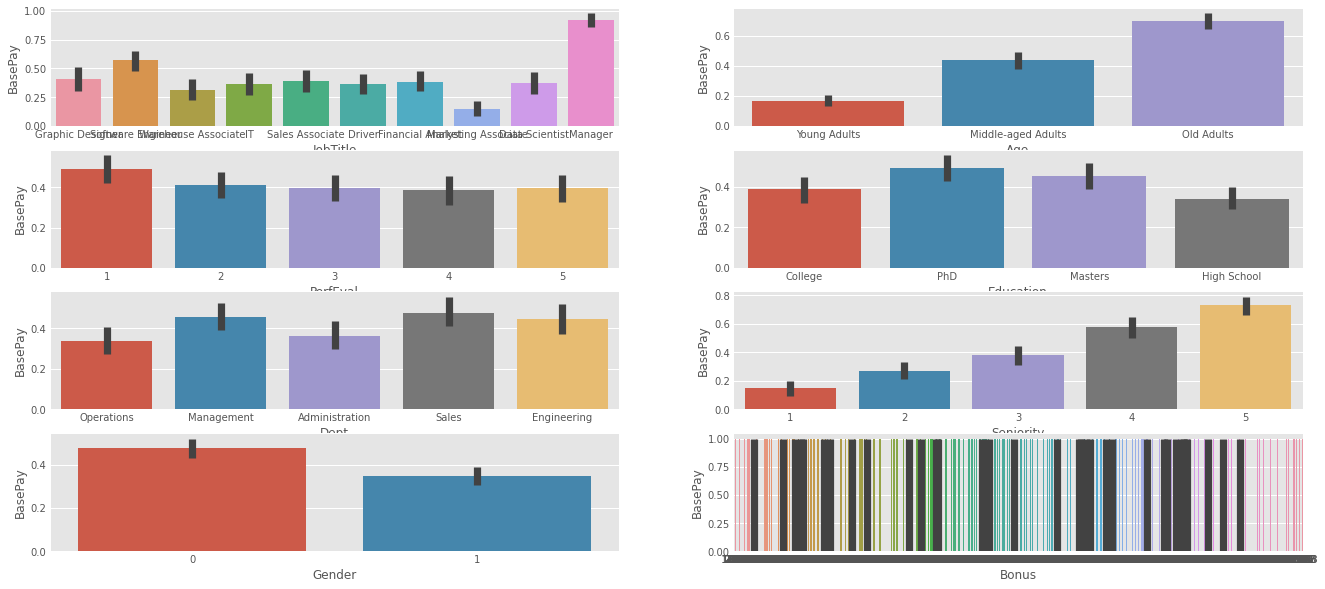

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(421)
sns.barplot(x = 'JobTitle', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(422)
sns.barplot(x = 'Age', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(423)
sns.barplot(x = 'PerfEval', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(424)
sns.barplot(x = 'Education', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(425)
sns.barplot(x = 'Dept', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(426)
sns.barplot(x = 'Seniority', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(427)
sns.barplot(x = 'Gender', y = 'BasePay', data = pay_gap_logistic)
plt.subplot(428)
sns.barplot(x = 'Bonus', y = 'BasePay', data = pay_gap_logistic);

In [28]:
dummies = ['JobTitle', 'Age', 'Education', 'Dept','Bonus']
dummy_pay_gap_logistic = pd.get_dummies(pay_gap_logistic[dummies])
dummy_pay_gap_logistic

Bonus  JobTitle_Data Scientist  JobTitle_Driver  \
0     9938                        0                0   
1    11128                        0                0   
2     9268                        0                0   
3    10154                        0                0   
4     9319                        0                0   
..     ...                      ...              ...   
995   3270                        0                0   
996   3567                        1                0   
997   2724                        0                0   
998   2225                        0                0   
999   2244                        0                0   

     JobTitle_Financial Analyst  JobTitle_Graphic Designer  JobTitle_IT  \
0                             0                          1            0   
1                             0                          0            0   
2                             0                          0            0   
3                             0                          0            0   
4                             0                          1            0   
..                          ...                        ...          ...   
995                           0                          0            0   
996                           0                          0            0   
997                           1                          0            0   
998                           1                          0            0   
999                           1                          0            0   

     JobTitle_Manager  JobTitle_Marketing Associate  JobTitle_Sales Associate  \
0                   0                             0                         0   
1                   0                             0                         0   
2                   0                             0                         0   
3                   0                             0                         0   
4                   0                             0                         0   
..                ...                           ...                       ...   
995                 0                             1                         0   
996                 0                             0                         0   
997                 0                             0                         0   
998                 0                             0                         0   
999                 0                             0                         0   

     JobTitle_Software Engineer  ...  Age_Old Adults  Education_College  \
0                             0  ...               0                  1   
1                             1  ...               0                  1   
2                             0  ...               0                  0   
3                             1  ...               0                  0   
4                             0  ...               0                  0   
..                          ...  ...             ...                ...   
995                           0  ...               1                  0   
996                           0  ...               1                  0   
997                           0  ...               0                  0   
998                           0  ...               1                  0   
999                           0  ...               1                  0   

     Education_High School  Education_Masters  Education_PhD  \
0                        0                  0              0   
1                        0                  0              0   
2                        0                  0              1   
3                        0                  1              0   
4                        0                  1              0   
..                     ...                ...            ...   
995                      1                  0              0   
996                      0                  1

In [31]:
pay_gap_logistic1 = pd.concat([pay_gap_logistic, dummy_pay_gap_logistic], axis = 1)
pay_gap_logistic1.drop(dummies, axis=1, inplace=True)
pay_gap_logistic1

Gender  PerfEval  Seniority  BasePay  TotalPay  JobTitle_Data Scientist  \
0         1         5          2        0     52301                        0   
1         0         5          5        1    119604                        0   
2         1         4          5        0     99476                        0   
3         0         5          4        1    118234                        0   
4         0         5          5        0    108783                        0   
..      ...       ...        ...      ...       ...                      ...   
995       1         1          1        0     65914                        0   
996       0         1          2        1    112544                        1   
997       0         1          1        0     95071                        0   
998       0         2          1        0     99601                        0   
999       0         1          2        1    125352                        0   

     JobTitle_Driver  JobTitle_Financial Analyst  JobTitle_Graphic Designer  \
0                  0                           0                          1   
1                  0                           0                          0   
2                  0                           0                          0   
3                  0                           0                          0   
4                  0                           0                          1   
..               ...                         ...                        ...   
995                0                           0                          0   
996                0                           0                          0   
997                0                           1                          0   
998                0                           1                          0   
999                0                           1                          0   

     JobTitle_IT  ...  Age_Old Adults  Education_College  \
0              0  ...               0                  1   
1              0  ...               0                  1   
2              0  ...               0                  0   
3              0  ...               0                  0   
4              0  ...               0                  0   
..           ...  ...             ...                ...   
995            0  ...               1                  0   
996            0  ...               1                  0   
997            0  ...               0                  0   
998            0  ...               1                  0   
999            0  ...               1                  0   

     Education_High School  Education_Masters  Education_PhD  \
0                        0                  0              0   
1                        0                  0              0   
2                        0                  0              1   
3                        0                  1              0   
4                        0                  1              0   
..                     ...                ...            ...   
995                      1                  0              0   
996                      0                  1              0   
997                      1                  0              0   
998                      1                  0              0   
999                      0                  0              1   

     Dept_Administration  Dept_Engineering  Dept_Management  Dept_Operations  \
0                      0                 0                0                1   
1                      0                 0                1                0   
2                      1                 0                0                0   
3                      0                 0                0                0   
4                      0                 1                0                0   
..                   ...               ...              ...              ...   
995                    1                 0   

# Split Dataset into Training Set and Test Set

In [32]:
from sklearn.model_selection import train_test_split
X = pay_gap_logistic1.drop('BasePay', axis = 1)
y = pay_gap_logistic1['BasePay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, log_loss, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [35]:
m_names = ['accuracy_score', 'log_loss']
metrics = [accuracy_score, log_loss]
for n, m in zip(m_names, metrics):
    print('{:.5f} : {}'.format(m(y_test, y_pred), n))

0.67576 : accuracy_score
11.19908 : log_loss


# Plot Confusion Matrix For Binary Classes With Labels And Percentages

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       189
           1       0.61      0.66      0.63       141

    accuracy                           0.68       330
   macro avg       0.67      0.67      0.67       330
weighted avg       0.68      0.68      0.68       330



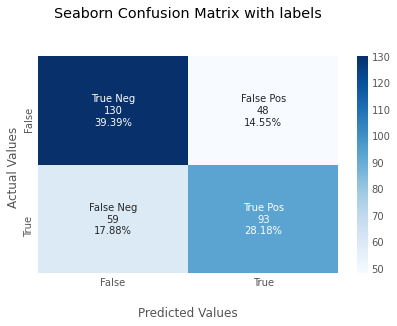

In [32]:
#Generate the confusion matrix
cf_matrix=confusion_matrix(y_pred, y_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

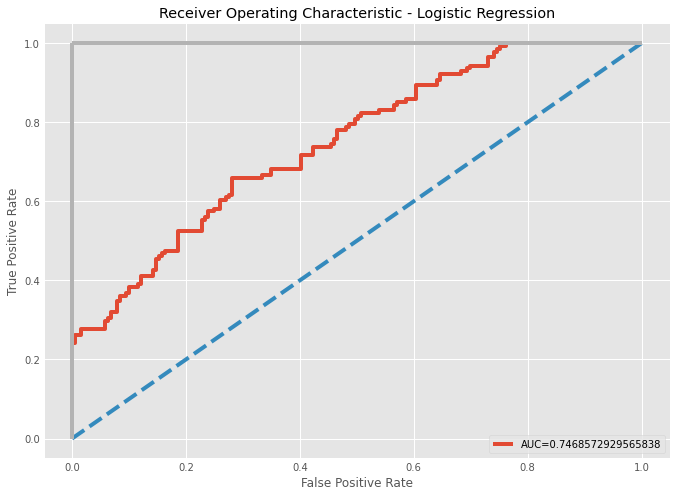

In [33]:
from sklearn import metrics

#define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression Feature Importance

In [35]:
from matplotlib import pyplot
# get importance
importance = log_reg.coef_[0]
feature_imp = pd.Series(importance,index=X.columns.values).sort_values(ascending=False)
feature_imp

Age_Old Adults                  0.150022
JobTitle_Manager                0.085817
JobTitle_Software Engineer      0.014527
TotalPay                        0.000030
Seniority                      -0.002615
Dept_Sales                     -0.012243
Education_PhD                  -0.012725
JobTitle_Financial Analyst     -0.014511
Dept_Management                -0.015127
JobTitle_Sales Associate       -0.029895
JobTitle_Graphic Designer      -0.035383
Dept_Engineering               -0.035845
JobTitle_Warehouse Associate   -0.038587
JobTitle_Driver                -0.038685
JobTitle_Data Scientist        -0.038795
JobTitle_IT                    -0.038872
Education_Masters              -0.041000
Age_Middle-aged Adults         -0.046866
Dept_Administration            -0.072362
Education_College              -0.073630
Dept_Operations                -0.096679
JobTitle_Marketing Associate   -0.097873
Education_High School          -0.104902
Gender                         -0.151584
Age_Young Adults

No handles with labels found to put in legend.


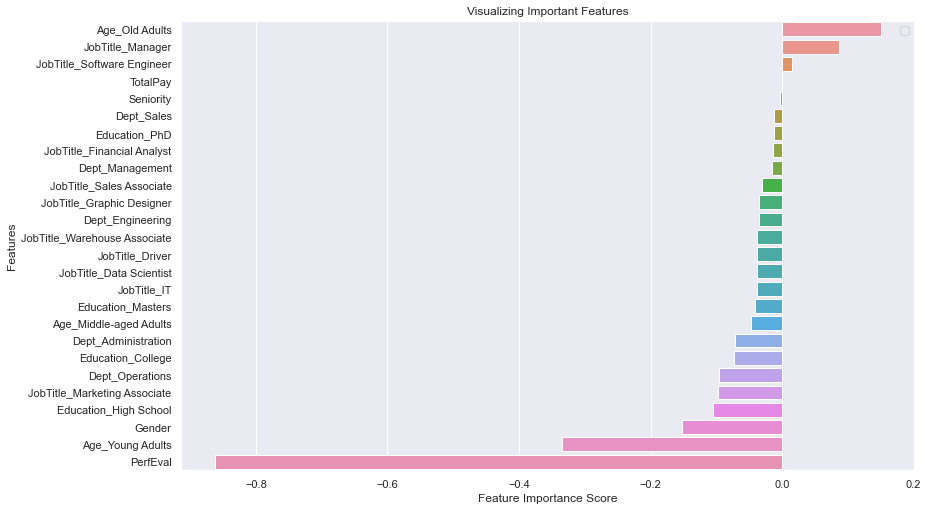

In [36]:
# Creating a bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# #GENETIC ALGORITHM ON LOGOSTIC REGRESSION


In [36]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        logreg.fit(X_train.iloc[:,chromosome],y_train)
        predictions = logreg.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,X_test, y_train, y_test):
                                   
    best_chromo= []
    best_score= []
    population_nextgen = initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [38]:
logreg = LogisticRegression(solver='lbfgs', max_iter=4000)
chromo,score=generations(size=500,n_feat=26,n_parents=200,mutation_rate=0.10, n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
logreg.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = logreg.predict(X_test.iloc[:,chromo[-1]])
#"Accuracy score after genetic algorithm is= "+
print( str(accuracy_score(y_test,predictions)))

[0.9484848484848485, 0.9303030303030303]
[0.9454545454545454, 0.9454545454545454]
[0.896969696969697, 0.896969696969697]
[0.8848484848484849, 0.8848484848484849]
[0.8575757575757575, 0.8575757575757575]
[0.8909090909090909, 0.8909090909090909]
[0.8545454545454545, 0.8545454545454545]
[0.8636363636363636, 0.8636363636363636]
[0.8848484848484849, 0.8848484848484849]
[0.8636363636363636, 0.8636363636363636]
[0.9030303030303031, 0.9030303030303031]
[0.9151515151515152, 0.9151515151515152]
[0.8787878787878788, 0.8787878787878788]
[0.8666666666666667, 0.8666666666666667]
[0.8515151515151516, 0.8515151515151516]
[0.8666666666666667, 0.8666666666666667]
[0.8636363636363636, 0.8636363636363636]
[0.8606060606060606, 0.8606060606060606]
[0.8636363636363636, 0.8636363636363636]
[0.8666666666666667, 0.8666666666666667]
[0.8696969696969697, 0.8696969696969697]
[0.8666666666666667, 0.8666666666666667]
[0.8606060606060606, 0.8606060606060606]
[0.8666666666666667, 0.8666666666666667]
[0.860606060606060

# Random Forest

In [39]:
#Create a Gaussian Classifier
pay_gap_rf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
pay_gap_rf.fit(X_train,y_train)
y_pred=pay_gap_rf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
m_names = ['accuracy_score', 'log_loss']
metrics = [accuracy_score, log_loss]
for n, m in zip(m_names, metrics):
    print('{:.5f} : {}'.format(m(y_test, y_pred), n))

0.99697 : accuracy_score
0.10467 : log_loss


# Plot Confusion Matrix For Binary Classes With Labels And Percentages

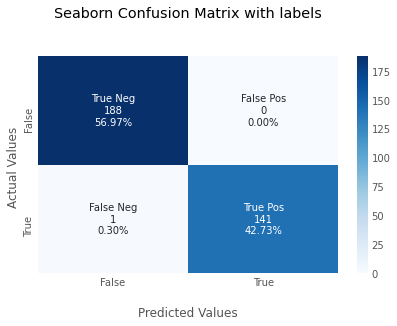

In [40]:
#Generate the confusion matrix
cf_matrix=confusion_matrix(y_pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Receiver Operating Characteristic

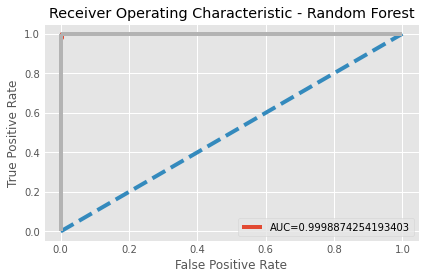

In [41]:
from sklearn import metrics
#define metrics
y_pred_proba = pay_gap_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Accuracy, Precision, Recall & F1-Score

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       189
           1       0.99      1.00      1.00       141

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



In [43]:
feature_imp = pd.Series(pay_gap_rf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
feature_imp 

TotalPay                        0.577318
Seniority                       0.099884
Age_Young Adults                0.065429
Age_Old Adults                  0.060756
JobTitle_Manager                0.042008
PerfEval                        0.022136
JobTitle_Marketing Associate    0.015278
Age_Middle-aged Adults          0.012175
Gender                          0.008306
Dept_Operations                 0.007437
Education_Masters               0.007128
Education_PhD                   0.007024
JobTitle_Sales Associate        0.006491
Education_High School           0.006366
Dept_Sales                      0.006204
JobTitle_Software Engineer      0.006181
Dept_Engineering                0.005907
Dept_Management                 0.005901
Education_College               0.005755
Dept_Administration             0.005685
JobTitle_IT                     0.005280
JobTitle_Warehouse Associate    0.004661
JobTitle_Financial Analyst      0.004305
JobTitle_Graphic Designer       0.004293
JobTitle_Driver 

No handles with labels found to put in legend.


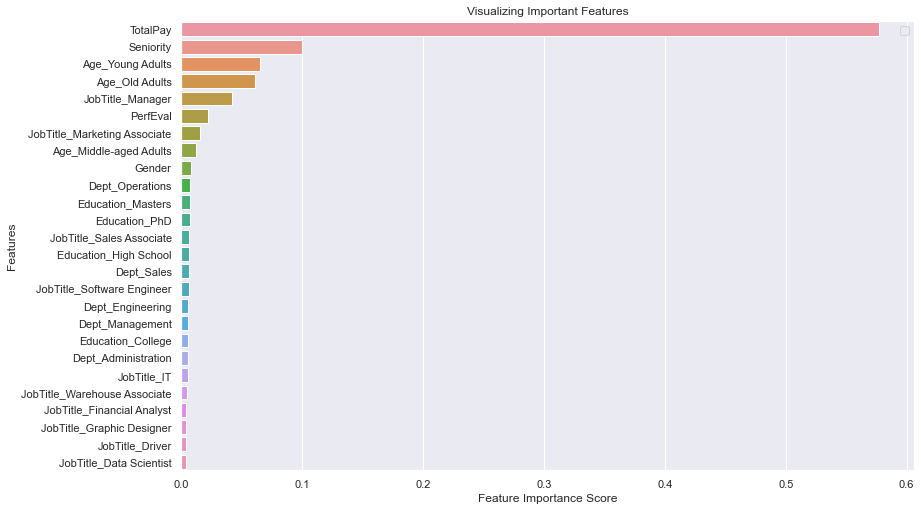

In [44]:
# Creating a bar plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [52]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        pay_gap_rf.fit(X_train.iloc[:,chromosome],y_train)
        predictions = pay_gap_rf.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,X_test, y_train, y_test):
                                   
    best_chromo= []
    best_score= []
    population_nextgen = initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [54]:
chromo,score=generations(size=150,n_feat=26,n_parents=5,mutation_rate=0.20, n_gen=38,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
pay_gap_rf.fit(X_train.iloc[:,chromo[-1]],y_train)
predictions = pay_gap_rf.predict(X_test.iloc[:,chromo[-1]])
#"Accuracy score after genetic algorithm is= "+
print( str(accuracy_score(y_test,predictions)))

[0.996969696969697, 0.996969696969697]
[0.996969696969697, 0.9939393939393939]
[0.9939393939393939, 0.9939393939393939]
[0.996969696969697, 0.9939393939393939]
[0.9939393939393939, 0.990909090909091]
[0.996969696969697, 0.9939393939393939]
[0.990909090909091, 0.990909090909091]
[0.9878787878787879, 0.9878787878787879]
[0.990909090909091, 0.990909090909091]
[0.9939393939393939, 0.990909090909091]
[0.990909090909091, 0.990909090909091]
[0.990909090909091, 0.990909090909091]
[0.9939393939393939, 0.9939393939393939]
[0.996969696969697, 0.9939393939393939]
[0.996969696969697, 0.9939393939393939]
[0.996969696969697, 0.996969696969697]
[0.996969696969697, 0.9939393939393939]
[0.996969696969697, 0.9939393939393939]
[0.996969696969697, 0.996969696969697]
[1.0, 0.996969696969697]
[0.996969696969697, 0.9939393939393939]
[0.9848484848484849, 0.9818181818181818]
[0.996969696969697, 0.9939393939393939]
[0.9939393939393939, 0.9939393939393939]
[0.996969696969697, 0.9939393939393939]
[0.98484848484848

# Linear Regression

<AxesSubplot:>

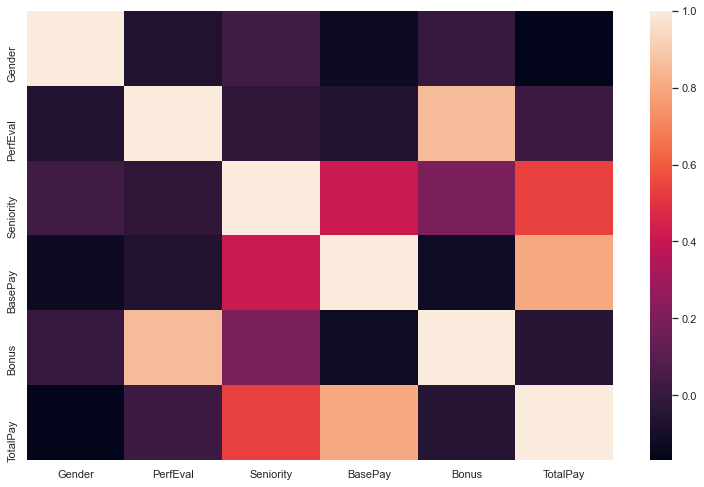

In [44]:
pay_gap_linear= df
sns.heatmap(pay_gap_linear.corr())   

(array([], dtype=int64),)


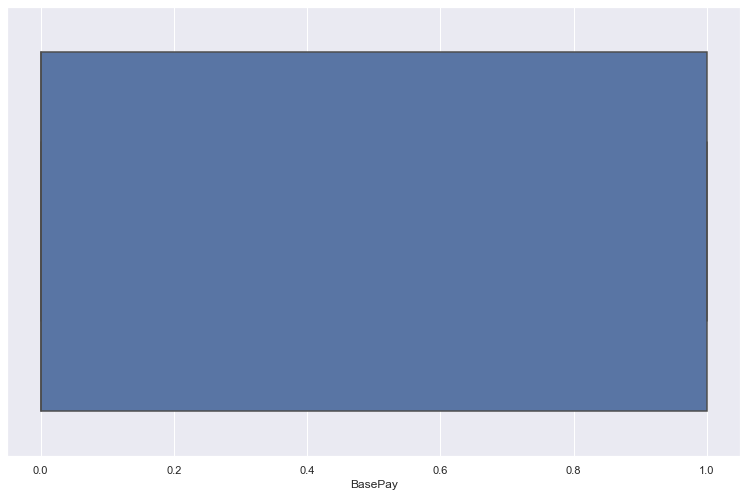

In [46]:
#Box Plot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(pay_gap_linear['BasePay'])
# Position of the Outlier
print(np.where(pay_gap_linear['BasePay']>165000))

In [47]:
# Removing the Outliers 
print("Old Shape: ", pay_gap_linear.shape)
pay_gap_linear = pay_gap_linear.drop(labels=[353, 609, 927], axis=0)
print("New Shape: ", pay_gap_linear.shape)

Old Shape:  (1000, 10)
New Shape:  (997, 10)


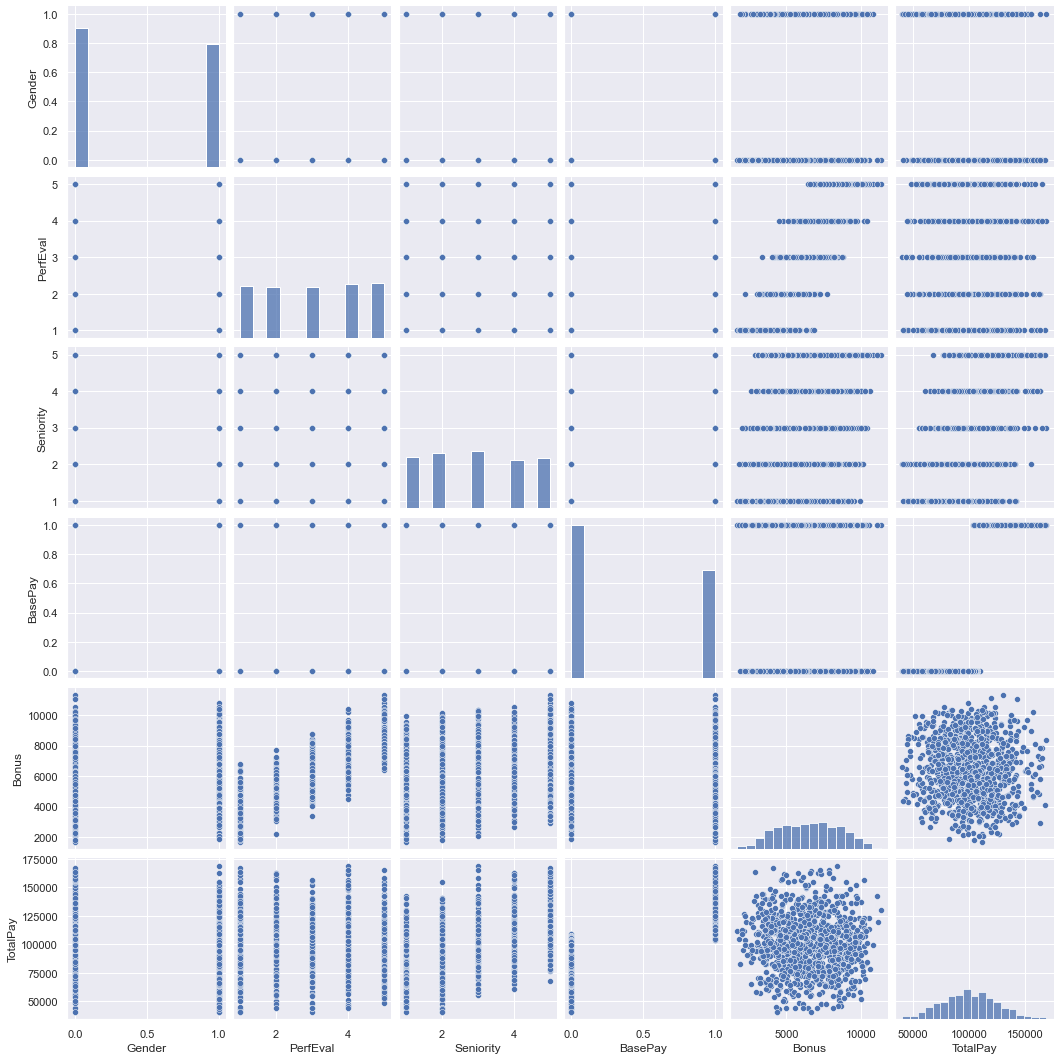

In [48]:
# Scatter plot
sns.pairplot(pay_gap_linear) # PerfEval has no effect on BasePay, so drop it. 